In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.axes import Axes as ax

import sklearn
from sklearn.model_selection import train_test_split

In [3]:
fifa = pd.read_csv('/work/players_fifa23.csv')
print(fifa.shape)
fifa

(18539, 90)


,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,243725,D. Collins,Darren Collins,21,174,68,https://cdn.sofifa.net/players/243/725/23_60.png,Republic of Ireland,47,56,...,50,44,50,41,38,41,40,36,40,15
18535,261933,Yang Dejiang,Dejiang Yang,17,175,60,https://cdn.sofifa.net/players/261/933/23_60.png,China PR,47,57,...,45,45,45,47,48,47,49,49,49,15
18536,267823,L. Mullan,Liam Mullan,18,170,65,https://cdn.sofifa.net/players/267/823/23_60.png,Northern Ireland,47,67,...,52,49,52,46,44,46,46,42,46,17
18537,267824,D. McCallion,Daithí McCallion,17,178,65,https://cdn.sofifa.net/players/267/824/23_60.png,Republic of Ireland,47,61,...,33,33,33,44,42,44,47,49,47,15


In [4]:
columns = fifa.columns
corr_list = []
column_needed = []
y = fifa['WageEUR']
for col in columns:
    if type(fifa[col][0]) == np.int64:
        corr = np.corrcoef(fifa[col], y)
        corr_list.append(np.round(corr[0][1], 3))
        column_needed.append(col)
data = {"Column": column_needed, "Correlation Score": corr_list}
correlation_score = pd.DataFrame(data)
correlation_score

,Column,Correlation Score
0,ID,-0.234
1,Age,0.144
2,Height,0.025
3,Weight,0.051
4,Overall,0.599
...,...,...
68,RWBRating,0.271
69,LBRating,0.254
70,CBRating,0.230
71,RBRating,0.254


In [5]:
correlation_score[correlation_score['Correlation Score'] > 0.4] 

,Column,Correlation Score
4,Overall,0.599
5,Potential,0.497
8,BaseStats,0.493
9,ValueEUR,0.822
10,WageEUR,1.000
11,ReleaseClause,0.792
13,IntReputation,0.630
18,PassingTotal,0.430
19,DribblingTotal,0.422
35,Reactions,0.540


In [6]:
df_5_component = fifa[['Overall', 'WageEUR', 'ReleaseClause', 'IntReputation', 'Reactions', 'Potential', 'ValueEUR']]
for col in df_5_component.columns: 
    df_5_component[col] = (df_5_component[col] - np.mean(df_5_component[col])) / np.std(df_5_component[col])
df_5_component

/tmp/ipykernel_593/2865694738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_component[col] = (df_5_component[col] - np.mean(df_5_component[col])) / np.std(df_5_component[col])


,Overall,WageEUR,ReleaseClause,IntReputation,Reactions,Potential,ValueEUR
0,3.704674,9.567081,6.462694,10.909451,3.422159,3.226918,6.696143
1,3.704674,22.670880,8.596061,8.121945,3.422159,3.226918,8.005914
2,3.704674,21.129256,11.390569,10.909451,3.534518,3.226918,10.625456
3,3.704674,17.532135,13.210406,8.121945,3.309800,3.226918,13.703418
4,3.704674,11.365642,24.647438,8.121945,3.534518,3.872840,24.574516
...,...,...,...,...,...,...,...
18534,-2.777191,-0.427777,-0.333207,-0.240574,-1.971064,-2.424899,-0.362212
18535,-2.777191,-0.427777,-0.335592,-0.240574,-1.184553,-2.263418,-0.364832
18536,-2.777191,-0.427777,-0.323733,-0.240574,-1.409270,-0.648613,-0.359593
18537,-2.777191,-0.427777,-0.331503,-0.240574,-2.083423,-1.617496,-0.363522


In [ ]:
df = fifa[['Overall', 'WageEUR', 'ReleaseClause', 'IntReputation', 'Potential', 'Reactions', 'ValueEUR']]
training, testing = train_test_split(df, test_size=0.2, random_state=41)
x_train = training[['Overall', 'WageEUR', 'ReleaseClause', 'IntReputation', 'Reactions', 'Potential']]
y_train = training['ValueEUR']
x_test = testing[['Overall', 'WageEUR', 'ReleaseClause', 'IntReputation', 'Reactions', 'Potential']]
y_test = testing['ValueEUR']


In [42]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(x_train, y_train)
#model.predict(x_test)
model.score(x_train, y_train), model.score(x_test, y_test)


(0.9609081458607465, 0.9607813451989228)

In [9]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(10, 10), activation = 'tanh', solver='sgd', random_state=42)
classifier.fit(x_train, y_train)
#y_predict = classifier.predict(x_train)
classifier.score(x_train, y_train), classifier.score(x_test, y_test)


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.0389724226282786, 0.0412621359223301)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(x_train, y_train)

predictions = rf.predict(x_test)

errors = abs(predictions - y_test)

mape = 100 * (errors / y_test)

accuracy = 100 - np.mean(mape)

accuracy 
rf.score(x_train, y_train)


0.9975394339924804

In [48]:
rf.score(x_test, y_test)

0.9867029869963283

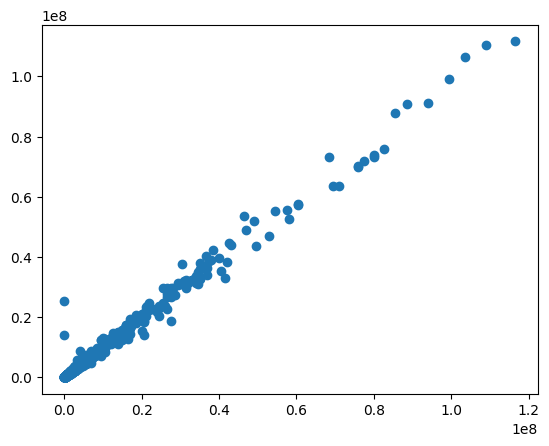

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)

In [50]:
from sklearn.tree import DecisionTreeRegressor 
  
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(x_train, y_train)

predictions = regressor.predict(x_test)

regressor.score(x_train, y_train), regressor.score(x_test, y_test)

(0.9999732354324999, 0.9753898165403602)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc80a5ab-5a4e-4539-9976-15d1bdddd134' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>